In [4]:
import os
import pandas as pd
import json
from datetime import datetime
import re

# Swimmer 65
# ant 6.5
# halfcheetah 8
# walker2d 7

# Initialize empty dictionary
experiments_data = {}

base_paths = []
starting_data_strs = []
finishing_data_strs = [] # List for finishing times

current_time_str = datetime.now().strftime("%Y-%m%d-%H%M%S")
print("Current time string:", current_time_str)
# Base path
# base_paths.append("test/swimmer/ERM/")
# base_paths.append("test/ant/ERM/")
# base_paths.append("test/halfcheetah/ERM/")
base_paths.append("test/swimmer/ERM/")



# starting_data_strs.append('2025-0426-100000')
finishing_data_strs.append(current_time_str) # Now

starting_data_strs.append('2025-0512-164000')
# finishing_data_strs.append('2025-0426-230000') # Now

# base_paths.append("test/swimmer/ManifoldGradientBatch/")
# starting_data_strs.append('2025-0427-220000')
# starting_data_strs.append('2025-0427-103000')
# starting_data_strs.append('2025-0428-203000')
# # starting_data_strs.append('2025-0429-171500')
# # finishing_data_strs.append('2025-0429-120000') # Now

# finishing_data_strs.append(current_time_str) # Now

# finishing_data_strs.append('2025-0428-11000')

# finishing_data_strs.append(current_time_str) # Now

# Starting datetime for filtering

for base_path, starting_data_str, finishing_data_str in zip(base_paths, starting_data_strs, finishing_data_strs):
    starting_data = datetime.strptime(starting_data_str, "%Y-%m%d-%H%M%S")
    finishing_data = datetime.strptime(finishing_data_str, "%Y-%m%d-%H%M%S")
    # List all folders in the directory
    folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]

    print("Found folders:", folders)
    for folder in folders:
        try:
            # folder_datetime = datetime.strptime(folder, "%Y-%m%d-%H%M%S-%f")
            folder_datetime = datetime.strptime(folder, "%Y-%m%d-%H%M%S")
        except :
            try:
                folder_datetime = datetime.strptime(folder, "%Y-%m%d-%H%M%S-%f")
            except :
                # print(f"Warning: Folder name {folder} is not in the expected datetime format.")
                continue

        # Now we have a valid datetime
        # if folder_datetime < starting_data or folder_datetime > finishing_data:
        if folder_datetime >= starting_data and folder_datetime <= finishing_data:
            print(f"Folder datetime: {folder_datetime}, Starting data: {starting_data}, Finishing data: {finishing_data}")

            folder_path = os.path.join(base_path, folder)

            # Paths to the files
            losses_path = os.path.join(folder_path, "losses.csv")
            args_path = os.path.join(folder_path, "args.json")
            log_path = os.path.join(folder_path, "logs", "log.txt")

            # Initialize dict for this experiment
            experiments_data[folder] = {}
            if os.path.exists(losses_path) and os.path.exists(args_path) and os.path.exists(log_path):
                with open(log_path, 'r') as f:
                    log_content = f.read()
                    match = re.search(r"Lipschitz constant: ([\d\.]+)", log_content)
                    if match:
                        experiments_data[folder]['lipschitz_constant'] = float(match.group(1))
                        with open(args_path, 'r') as f:
                            experiments_data[folder]['args'] = json.load(f)
                        experiments_data[folder]['losses'] = pd.read_csv(losses_path)

                    else:
                        print(f"Warning: Lipschitz constant not found in {log_path}.")

            # Load losses.csv
            # if os.path.exists(losses_path):
            #     experiments_data[folder]['losses'] = pd.read_csv(losses_path)
            # else:
            #     print(f"Warning: {losses_path} not found.")

            # # Load args.json
            # if os.path.exists(args_path):
            #     with open(args_path, 'r') as f:
            #         experiments_data[folder]['args'] = json.load(f)
            # else:
            #     print(f"Warning: {args_path} not found.")

            # # Load Lipschitz constant from log.txt
            # if os.path.exists(log_path):
            #     with open(log_path, 'r') as f:
            #         log_content = f.read()
            #         match = re.search(r"Lipschitz constant: ([\d\.]+)", log_content)
            #         if match:
            #             experiments_data[folder]['lipschitz_constant'] = float(match.group(1))
            #         else:
            #             print(f"Warning: Lipschitz constant not found in {log_path}.")
            # else:
            #     print(f"Warning: {log_path} not found.")

    # Now `experiments_data` has all the information loaded!

# Example: Print the keys loaded
print("Loaded experiment data for:", list(experiments_data.keys()))
print("Loaded experiment data for:", len(experiments_data.keys()))


Current time string: 2025-0513-084153
Found folders: ['2025-0512-230049-108388', '2025-0512-165026-544228', '2025-0512-163813-145202', '2025-0512-170735-021310', '2025-0512-234139-171738', '2025-0512-165021-797616', '2025-0512-165026-740049', '2025-0512-235046-191050', '2025-0512-152050-673494', '2025-0512-165026-544359', '2025-0512-230049-110225', '2025-0512-230052-598754', '2025-0512-235246-002812', '2025-0512-230049-108648', '2025-0512-233535-339057', '2025-0512-165021-819579', '2025-0512-165845-270015', '2025-0512-235723-387609', '2025-0512-230052-598737', '2025-0512-233535-338883', '2025-0512-230049-108247', '2025-0512-165023-319442', '2025-0512-165023-319645', '2025-0512-230049-108923', '2025-0512-231745-355913', '2025-0512-165026-740123', '2025-0512-230940-900603', '2025-0512-232625-602284', '2025-0512-230049-110101']
Folder datetime: 2025-05-12 23:00:49.108388, Starting data: 2025-05-12 16:40:00, Finishing data: 2025-05-13 08:41:53
Folder datetime: 2025-05-12 16:50:26.544228, S

In [5]:
print(len(experiments_data))  # Number of experiments loaded
for key in experiments_data:
    print(f"Experiment: {key}")
    if 'losses' in experiments_data[key]:
        print(f"  Losses shape: {experiments_data[key]['losses'].iloc[-1]['Accuracy']}")
    # if 'args' in experiments_data[key]:
        print(f"  Args: {experiments_data[key]['args']['n_train']}")
    # if 'args' in experiments_data[key]:
        print(f"  Args: {experiments_data[key]['args']['algorithm']}")
    # if 'lipschitz_constant' in experiments_data[key]:
        print(f"  Lipschitz constant: {experiments_data[key]['lipschitz_constant']}")
    # print()  # New line for better readability

27
Experiment: 2025-0512-230049-108388
  Losses shape: 0.0169652008066574
  Args: 12
  Args: ERM
  Lipschitz constant: 37.67332458496094
Experiment: 2025-0512-165026-544228
  Losses shape: 0.0036990956799127
  Args: 14
  Args: ERM
  Lipschitz constant: 58.01301193237305
Experiment: 2025-0512-170735-021310
  Losses shape: 0.0034273002973447
  Args: 20
  Args: ERM
  Lipschitz constant: 65.59319305419922
Experiment: 2025-0512-234139-171738
Experiment: 2025-0512-165021-797616
  Losses shape: 0.0188612403261164
  Args: 2
  Args: ERM
  Lipschitz constant: 17.760726928710938
Experiment: 2025-0512-165026-740049
  Losses shape: 0.0070460330223043
  Args: 8
  Args: ERM
  Lipschitz constant: 42.36481475830078
Experiment: 2025-0512-235046-191050
Experiment: 2025-0512-165026-544359
  Losses shape: 0.0041358484970405
  Args: 16
  Args: ERM
  Lipschitz constant: 62.899410247802734
Experiment: 2025-0512-230049-110225
  Losses shape: 0.0227743261878689
  Args: 2
  Args: ERM
  Lipschitz constant: 17.676

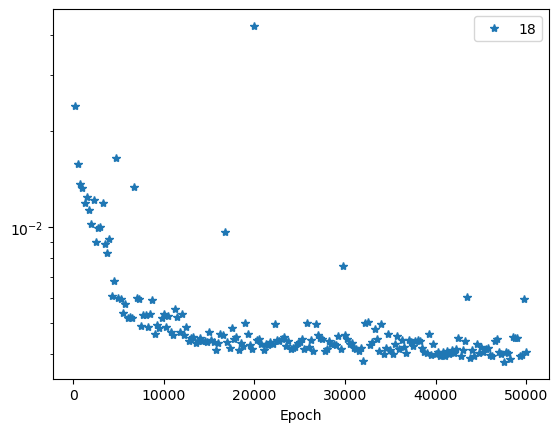

In [6]:
import matplotlib.pyplot as plt


values = [18]
# Plotting the losses for each experiment
for key, data in experiments_data.items():
    if 'losses' in data:
        if experiments_data[key]['args']['n_train'] in values:
            plt.plot(data['losses']['Epoch'], data['losses']['Accuracy'], "*",label=experiments_data[key]['args']['n_train'])
        
plt.xlabel('Epoch')
plt.yscale('log')
plt.legend()

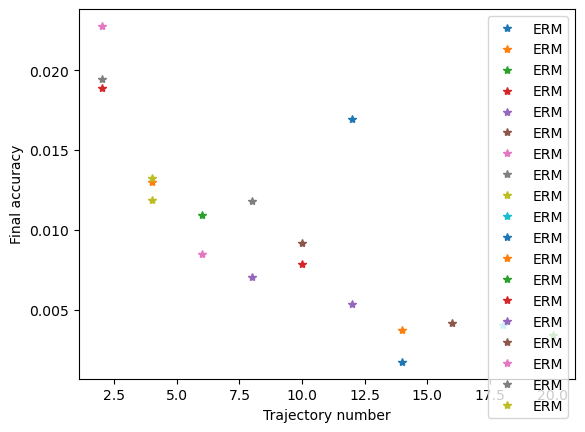

In [7]:
import matplotlib.pyplot as plt
# Plotting the losses for each experiment
for key, data in experiments_data.items():
    if 'losses' in data:
        plt.plot(experiments_data[key]['args']['n_train'], data['losses']['Accuracy'].iloc[-1], '*',label=experiments_data[key]['args']['algorithm'])
        
plt.xlabel('Trajectory number')
plt.ylabel('Final accuracy')
# plt.yscale('log')
plt.legend()

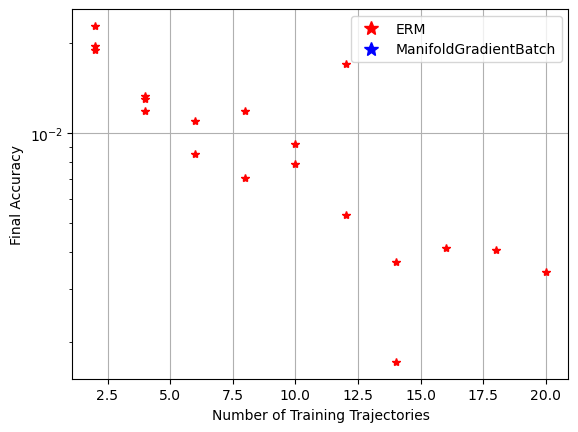

In [8]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Plotting the losses for each experiment
for key, data in experiments_data.items():
    if 'losses' in data:
        if experiments_data[key]['args']['algorithm'] == 'ERM':
            plt.plot(experiments_data[key]['args']['n_train'], data['losses']['Accuracy'].iloc[-1], 'r*')
        elif experiments_data[key]['args']['algorithm'] == 'ManifoldGradientBatch':
            plt.plot(experiments_data[key]['args']['n_train'], data['losses']['Accuracy'].iloc[-1], 'b*')


red_star = mlines.Line2D([], [], color='red', marker='*', linestyle='None', markersize=10, label='ERM')
blue_star = mlines.Line2D([], [], color='blue', marker='*', linestyle='None', markersize=10, label='ManifoldGradientBatch')


plt.legend(handles=[red_star, blue_star])
plt.yscale('log')
plt.xlabel('Number of Training Trajectories')
plt.ylabel('Final Accuracy')
plt.grid(True)
plt.savefig('inverted_pendulum_accuracy_vs_n_train.png', dpi=300)

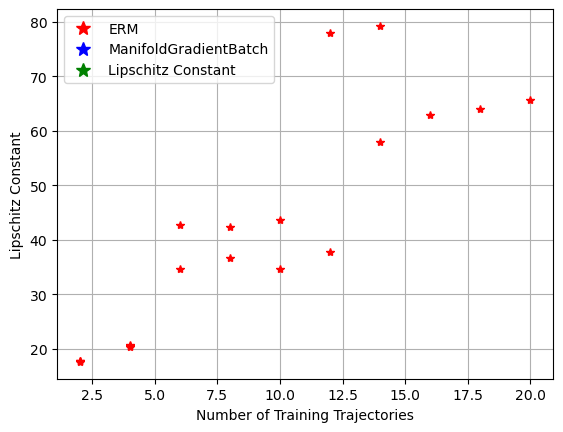

In [9]:
import matplotlib.pyplot as plt
# Plotting the losses for each experiment
for key, data in experiments_data.items():
    if 'losses' in data:
        if experiments_data[key]['args']['algorithm'] == 'ERM':
            try:
                plt.plot(experiments_data[key]['args']['n_train'], experiments_data[key]['lipschitz_constant'],'r*')
            except:
                continue
        elif experiments_data[key]['args']['algorithm'] == 'ManifoldGradientBatch':
            try:
                plt.plot(experiments_data[key]['args']['n_train'], experiments_data[key]['lipschitz_constant'],'b*')
            except:
                continue
            plt.plot(experiments_data[key]['args']['n_train'], experiments_data[key]['args']['lipschitz_constant'],'g*')

            print(experiments_data[key]['args']['algorithm'], experiments_data[key]['args']['n_train'],experiments_data[key]['lipschitz_constant']- experiments_data[key]['args']['lipschitz_constant'] ,experiments_data[key]['lipschitz_constant'], experiments_data[key]['args']['lipschitz_constant'])
            

red_star = mlines.Line2D([], [], color='red', marker='*', linestyle='None', markersize=10, label='ERM')
blue_star = mlines.Line2D([], [], color='blue', marker='*', linestyle='None', markersize=10, label='ManifoldGradientBatch')
green_star = mlines.Line2D([], [], color='green', marker='*', linestyle='None', markersize=10, label='Lipschitz Constant')


plt.legend(handles=[red_star, blue_star, green_star])
# plt.yscale('log')
plt.xlabel('Number of Training Trajectories')
plt.ylabel('Lipschitz Constant')

plt.grid(True)
plt.savefig('lipschitz_constant_vs_n_train.png')